<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/PYMES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import squarify
sns.set()

In [3]:
data = pd.read_json('https://www.datos.gov.co/resource/w8x2-pre7.json')
data.head()

,matricula,organizacion,categoria,est_matricula,razon_social,fec_matricula,fec_renovacion,ult_ano_ren,fec_cancelacion,fec_constitucion,...,fec_pag_ren_2020,fec_pag_ren_2021,fec_pag_ren_2022,acti_2018,acti_2019,acti_2020,acti_2021,acti_2022,mot_can,ciiu_4
0,44130,4,1,MF,AGROTALURA S.A,20101014,20170329,2017,20170427,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Cambio de domicilio,NaN
1,32691,1,N/A,MC,FRANCO VILLADIEGO LIZARDO,20040326,20170310,2017,20220428,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Depuración,N/A
2,50260,1,N/A,MC,OCHOA SANTAMARIA ALEJANDRA,20130606,20130606,2013,20180430,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Depuración,N/A
3,64702,16,1,MI,EL CAMPO BIO S.A.S,20181212,20190327,2019,N/A,20181212,...,N/A,N/A,N/A,160000000,160000000,N/A,N/A,N/A,N/A,N/A
4,50789,1,N/A,MC,BENITEZ ORTIZ EDGAR ANCISAR,20130821,20130821,2013,20180430,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Depuración,A0121 ** Cultivo de frutas tropicales y subtro...


In [4]:
data.columns

Index(['matricula', 'organizacion', 'categoria', 'est_matricula',
       'razon_social', 'fec_matricula', 'fec_renovacion', 'ult_ano_ren',
       'fec_cancelacion', 'fec_constitucion', 'dir_comercial', 'mun_comercial',
       'ciiu_1', 'ciiu_2', 'ciiu_3', 'actividad', 'ing_tam_empresarial',
       'tam_empresa', 'personal', 'activo_total', 'grupo_niif', 'ano_datos',
       'fecha_datos', 'fec_pag_ren_2018', 'fec_pag_ren_2019',
       'fec_pag_ren_2020', 'fec_pag_ren_2021', 'fec_pag_ren_2022', 'acti_2018',
       'acti_2019', 'acti_2020', 'acti_2021', 'acti_2022', 'mot_can',
       'ciiu_4'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   matricula            1000 non-null   int64 
 1   organizacion         1000 non-null   int64 
 2   categoria            1000 non-null   object
 3   est_matricula        1000 non-null   object
 4   razon_social         1000 non-null   object
 5   fec_matricula        1000 non-null   int64 
 6   fec_renovacion       1000 non-null   int64 
 7   ult_ano_ren          1000 non-null   int64 
 8   fec_cancelacion      1000 non-null   object
 9   fec_constitucion     1000 non-null   object
 10  dir_comercial        1000 non-null   object
 11  mun_comercial        1000 non-null   object
 12  ciiu_1               1000 non-null   object
 13  ciiu_2               1000 non-null   object
 14  ciiu_3               1000 non-null   object
 15  actividad            1000 non-null   object
 16  ing_tam

In [6]:
data.isnull().sum()

matricula              0
organizacion           0
categoria              0
est_matricula          0
razon_social           0
fec_matricula          0
fec_renovacion         0
ult_ano_ren            0
fec_cancelacion        0
fec_constitucion       0
dir_comercial          0
mun_comercial          0
ciiu_1                 0
ciiu_2                 0
ciiu_3                 0
actividad              0
ing_tam_empresarial    0
tam_empresa            0
personal               0
activo_total           0
grupo_niif             0
ano_datos              0
fecha_datos            0
fec_pag_ren_2018       0
fec_pag_ren_2019       0
fec_pag_ren_2020       0
fec_pag_ren_2021       0
fec_pag_ren_2022       0
acti_2018              0
acti_2019              0
acti_2020              0
acti_2021              0
acti_2022              0
mot_can                0
ciiu_4                 1
dtype: int64

In [7]:
razon = data.groupby('razon_social')['matricula'].count()


In [8]:
razon

razon_social
2 MOLINAS S.A.S                                            1
A.P. SUMINISTROS Y CONSTRUCCIONES S.A.S. EN LIQUIDACION    1
ACEVEDO AGUDELO IRMAR ARLEY                                1
ACEVEDO ECHAVARRIA HEDILBERTO                              1
ACEVEDO GONZALEZ BERNEY DARIO                              1
                                                          ..
ZEA CARDENAS ROBEIRO ALONSO                                1
ZULETA ALVAREZ FLAVIO ISRAEL                               1
ZULETA CANDAMIL FLAVIO AUGUSTO                             1
ZULETA PATIÑO LUIS FELIPE                                  1
ZULUAGA MARIA ELENA JARAMILLO DE                           1
Name: matricula, Length: 999, dtype: int64

In [9]:
anos= data.groupby('ano_datos')['matricula'].count()

In [10]:
anos

ano_datos
1979      1
1980      1
1986      2
1988      2
1989      3
1990      3
1991      4
1992      2
1995      1
1996      3
1997      3
1998      5
2000      6
2001      5
2002      9
2003      8
2004      7
2005     14
2006     11
2007      9
2008      6
2009      7
2010     19
2011     24
2012     23
2013     63
2014     63
2015     77
2016     73
2017    123
2018    395
2019     15
2020      3
2021      2
2022      8
Name: matricula, dtype: int64

In [11]:
figure = px.line(anos, x=anos.index, y=anos.values, title='Actividad economica por años')
figure.show()

In [12]:
motivo = data.groupby(data['mot_can'])['matricula'].count()

Text(0.5, 1.0, 'Motivos de Cambios')

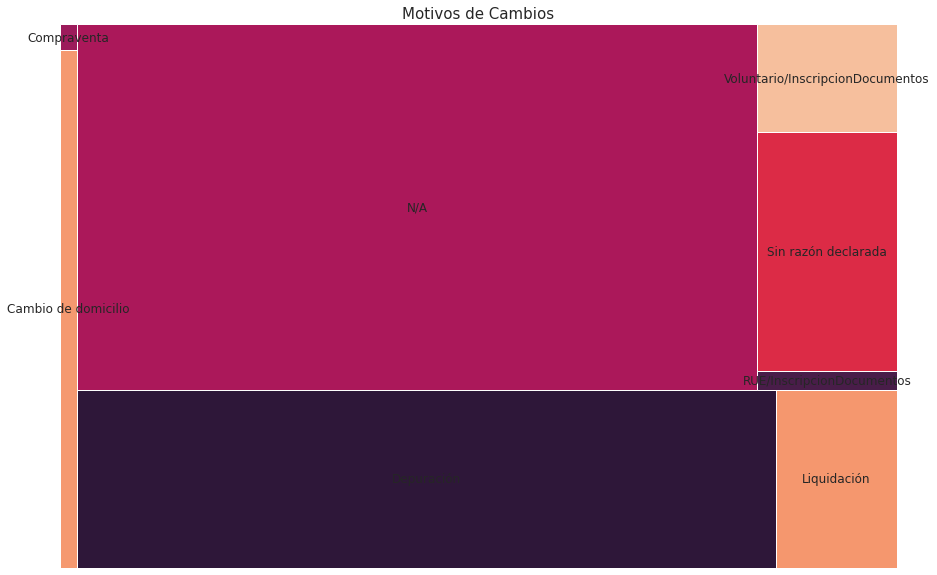

In [13]:
plt.figure(figsize=(15,10))
squarify.plot(sizes=motivo.values, label=motivo.index)
plt.axis('off')
plt.title('Motivos de Cambios', fontsize=15)

In [17]:
empresa = data.groupby(['ciiu_4'])['matricula'].count()
empresa

ciiu_4
A0121 ** Cultivo de frutas tropicales y subtropicales                                                                                                                                                                       1
A0141 ** Cria de ganado bovino y bufalino                                                                                                                                                                                   1
A0144 ** Cria de ganado porcino                                                                                                                                                                                             1
A0149 ** Cria de otros animales n.c.p.                                                                                                                                                                                      1
A0161 ** Actividades de apoyo a la agricultura                                                           